In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error,r2_score

In [147]:
# Assuming 'new_data_df' is your new DataFrame with the same columns as X_cls
# excluding 'Cons_Total_MWh' and 'Deficit_Flag'

# Example new data (replace with your actual new data)
new_data = {
    'City': ['Redwood', 'Brookfield'],
    'State': ['StateA', 'StateA'],
    'Year': [2023, 2023],
    'Month': [1, 2],
    'Population': [30000, 700000],
    'Households': [8000, 200000],
    'Businesses': [200, 3000],
    'Gen_Gas_MWh': [10000, 15000],
    'Gen_Coal_MWh': [5000, 3000],
    'Gen_Renew_MWh': [4000, 6000],
    'Gen_Total_MWh': [19000, 24000],
    'Cons_Household_MWh': [200000, 300000],
    'Cons_Commercial_MWh': [25000, 35000],
    'Cons_Industrial_MWh': [3000, 4000],
    'Energy_Wasted_MWh': [1000, 1500],
    'Renewable_Share_pct': [20, 25],
    'Avg_Income_USD': [40000, 160000],
    'Energy_per_capita_kWh': [400, 300]
}
new_data_df = pd.DataFrame(new_data)

# Define the Random Forest pipeline (copied from cell 0HHHpb_l2LUO)
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', models_cls["Random Forest"])])
rf_pipe.fit(X_train_cls, y_train_cls) # Fit the pipeline with training data

# Use the trained Random Forest pipeline to predict the Deficit Flag
predicted_deficit_flag = rf_pipe.predict(new_data_df)

print("Predicted Deficit Flag:", predicted_deficit_flag)

Predicted Deficit Flag: [1 1]


In [148]:
df=pd.read_csv('your_file_modified.csv')

In [149]:
df.shape


(20000, 20)

In [150]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   20000 non-null  object 
 1   State                  20000 non-null  object 
 2   Year                   20000 non-null  int64  
 3   Month                  20000 non-null  int64  
 4   Population             20000 non-null  int64  
 5   Households             20000 non-null  int64  
 6   Businesses             20000 non-null  int64  
 7   Gen_Gas_MWh            20000 non-null  float64
 8   Gen_Coal_MWh           20000 non-null  float64
 9   Gen_Renew_MWh          20000 non-null  float64
 10  Gen_Total_MWh          20000 non-null  float64
 11  Cons_Household_MWh     20000 non-null  float64
 12  Cons_Commercial_MWh    20000 non-null  float64
 13  Cons_Industrial_MWh    20000 non-null  float64
 14  Cons_Total_MWh         20000 non-null  float64
 15  En

In [151]:
df.describe()


,Year,Month,Population,Households,Businesses,Gen_Gas_MWh,Gen_Coal_MWh,Gen_Renew_MWh,Gen_Total_MWh,Cons_Household_MWh,Cons_Commercial_MWh,Cons_Industrial_MWh,Cons_Total_MWh,Energy_Wasted_MWh,Renewable_Share_pct,Avg_Income_USD,Energy_per_capita_kWh,Deficit_Flag
count,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2019.995300,6.546250,5.039233e+05,157825.503600,2996.249400,10116.448300,5034.784578,4034.459966,19185.692776,189455.009235,23907.890572,2527.238241,2.158901e+05,1438.656763,21.148549,130724.170075,427.877960,0.991250
std,1.420978,3.441722,3.196946e+05,103428.788128,2968.137722,7084.764135,3973.626228,3101.467925,12869.580012,136225.400902,25065.870927,2002.720662,1.525696e+05,1140.045832,7.504015,64132.150831,112.901555,0.093134
min,2018.000000,1.000000,3.232000e+03,993.000000,12.000000,0.000000,0.000000,0.000000,114.130000,581.730000,72.660000,0.000000,8.213200e+02,3.800000,0.000000,17578.030000,42.860000,0.000000
25%,2019.000000,4.000000,2.355818e+05,72537.000000,1055.000000,4393.435000,1896.340000,1561.195000,8772.832500,80808.750000,7826.102500,936.670000,9.376860e+04,563.495000,16.230000,77245.065000,348.940000,1.000000
50%,2020.000000,7.000000,4.763320e+05,145934.000000,2138.000000,8938.270000,4170.815000,3417.565000,17391.840000,165635.510000,16378.465000,2105.150000,1.908783e+05,1162.400000,21.000000,125167.005000,420.490000,1.000000
75%,2021.000000,10.000000,7.305465e+05,227358.000000,3823.000000,14574.112500,7249.897500,5799.122500,27692.320000,270380.717500,30643.887500,3638.727500,3.077056e+05,2040.865000,25.830000,176288.340000,499.902500,1.000000
max,2022.000000,12.000000,1.374174e+06,529947.000000,24207.000000,42694.420000,29125.800000,20524.650000,77687.080000,960101.950000,272087.870000,14357.420000,1.033506e+06,7899.270000,81.140000,310715.780000,986.810000,1.000000


In [152]:
df.duplicated().sum()


np.int64(0)

In [153]:
df.isnull().sum()

,0
City,0
State,0
Year,0
Month,0
Population,0
Households,0
Businesses,0
Gen_Gas_MWh,0
Gen_Coal_MWh,0
Gen_Renew_MWh,0


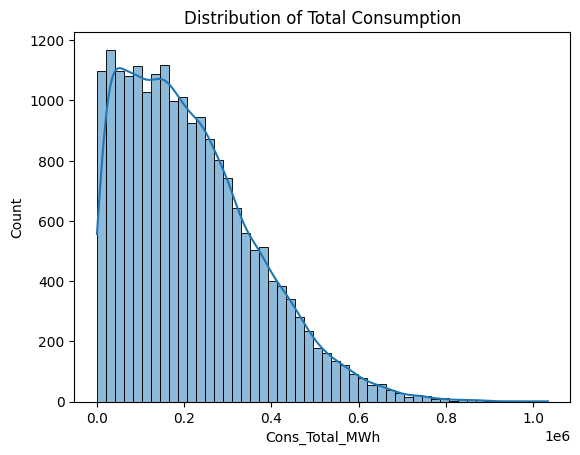

In [154]:
sns.histplot(df["Cons_Total_MWh"], bins=50, kde=True)
plt.title("Distribution of Total Consumption")
plt.show()

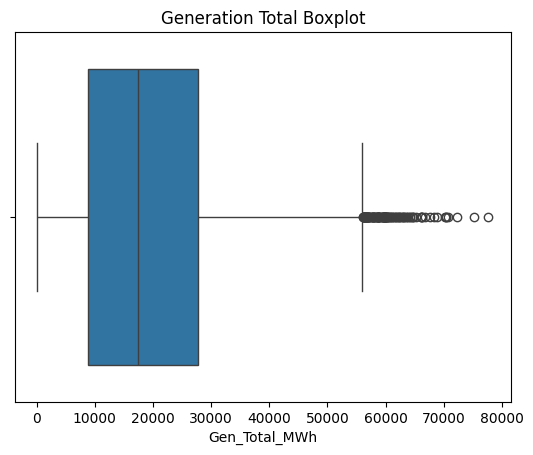

In [155]:
sns.boxplot(x=df["Gen_Total_MWh"])
plt.title("Generation Total Boxplot")
plt.show()

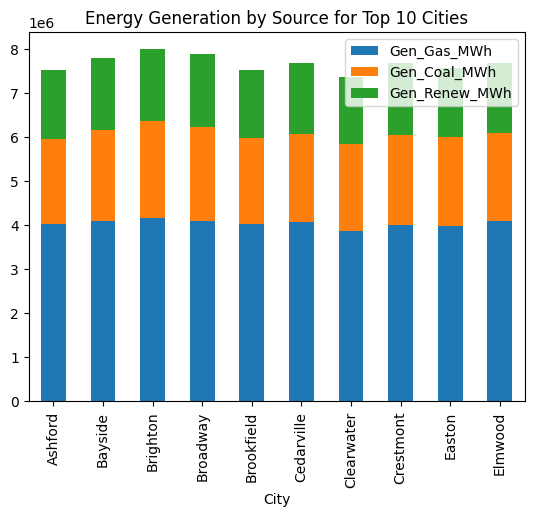

In [156]:
df.groupby("City")[["Gen_Gas_MWh","Gen_Coal_MWh","Gen_Renew_MWh"]].sum().head(10).plot(kind="bar", stacked=True)
plt.title("Energy Generation by Source for Top 10 Cities")
plt.show()

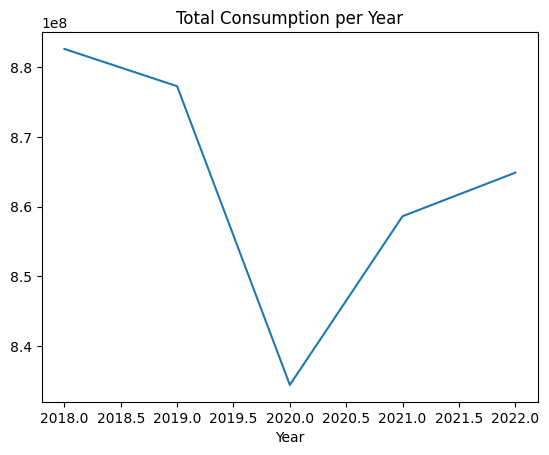

In [157]:
df.groupby("Year")["Cons_Total_MWh"].sum().plot(kind="line")
plt.title("Total Consumption per Year")
plt.show()


In [158]:
X = df.drop(columns=["Cons_Total_MWh", "Deficit_Flag", "City", "State"])
y = df["Cons_Total_MWh"]

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [160]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [161]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=5, random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=7),
}


In [162]:
results = []

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)

        results.append([name, round(r2_train, 4), round(r2_test, 4)])
    except Exception as e:
        print(f"Error with {name}: {e}")


In [163]:
results_df = pd.DataFrame(results, columns=["Model", "R² Train", "R² Test"])
print(results_df.sort_values(by="R² Test", ascending=False))



                     Model  R² Train  R² Test
0        Linear Regression    1.0000   1.0000
2  Random Forest Regressor    0.9998   0.9996
1  Decision Tree Regressor    0.9997   0.9986
3            KNN Regressor    0.9978   0.9970


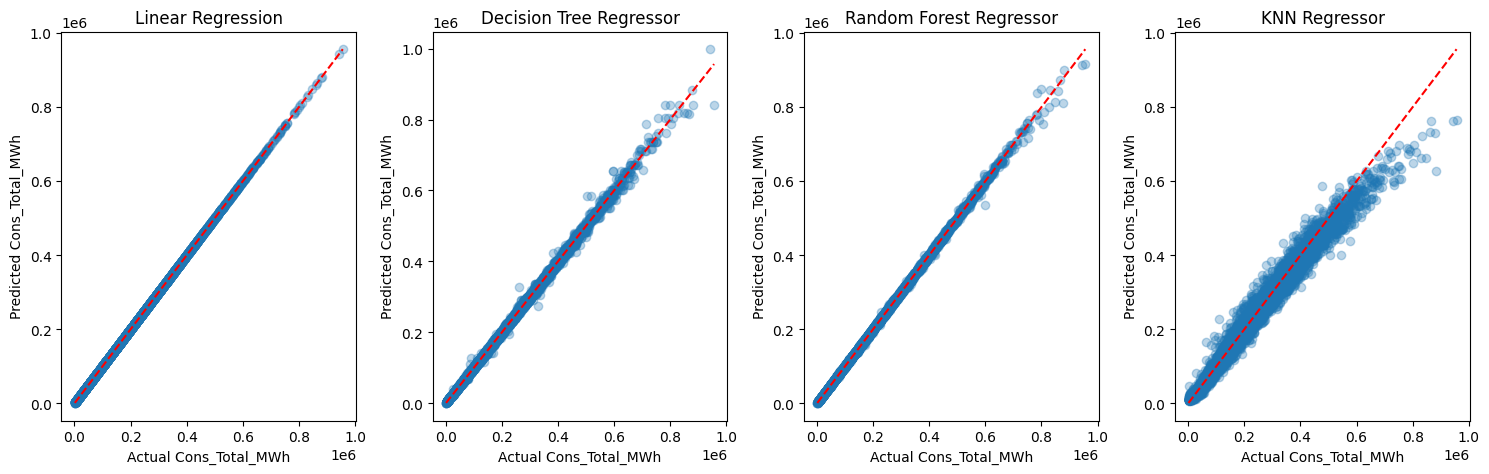

In [164]:
model_preds = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    model_preds[name] = y_pred
plt.figure(figsize=(15,5))
for i, (name, y_pred) in enumerate(model_preds.items()):
    plt.subplot(1, len(model_preds), i+1)
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Cons_Total_MWh")
    plt.ylabel("Predicted Cons_Total_MWh")
    plt.title(name)
plt.tight_layout()
plt.show()


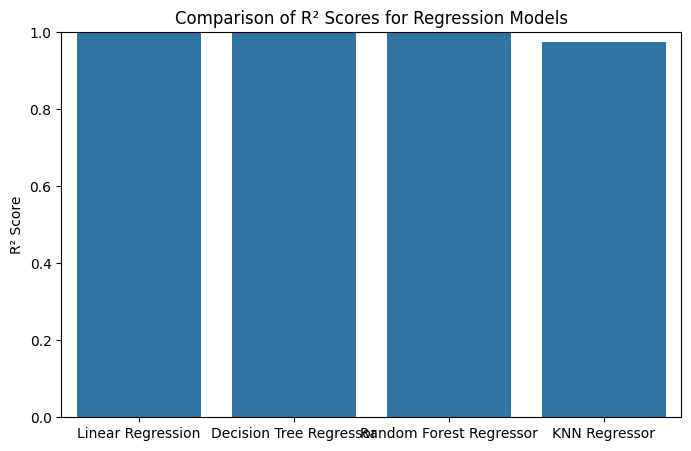

In [165]:
r2_scores = {name: r2_score(y_test, y_pred) for name, y_pred in model_preds.items()}
plt.figure(figsize=(8,5))
sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()))
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.title("Comparison of R² Scores for Regression Models")
plt.show()

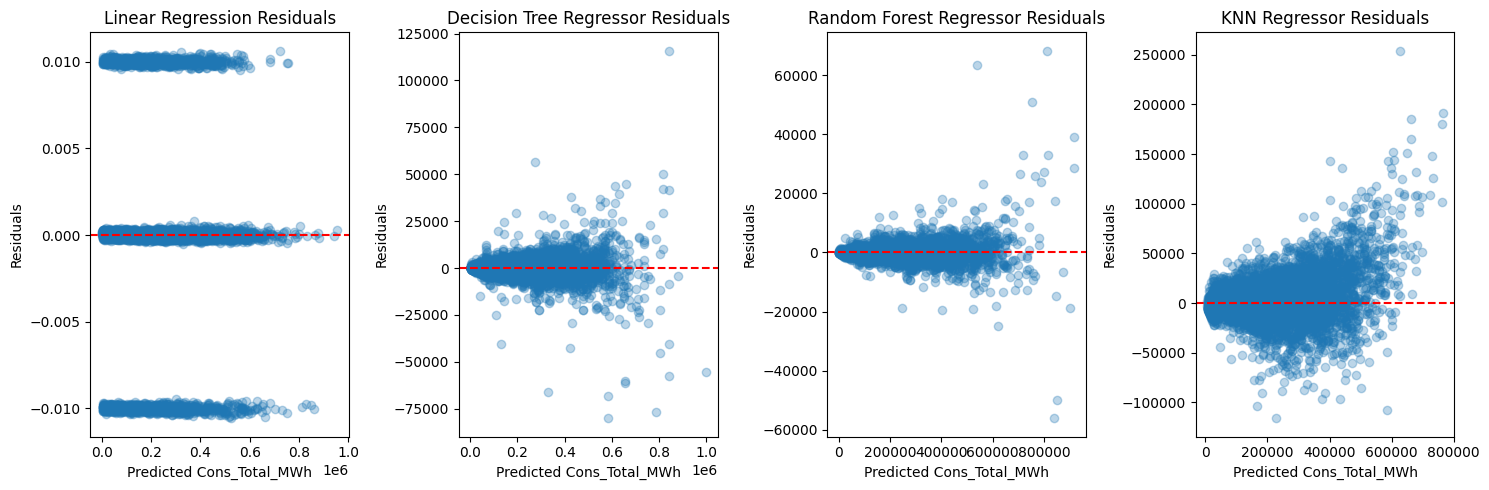

In [166]:
plt.figure(figsize=(15,5))
for i, (name, y_pred) in enumerate(model_preds.items()):
    residuals = y_test - y_pred
    plt.subplot(1, len(model_preds), i+1)
    plt.scatter(y_pred, residuals, alpha=0.3)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel("Predicted Cons_Total_MWh")
    plt.ylabel("Residuals")
    plt.title(f"{name} Residuals")
plt.tight_layout()
plt.show()

In [167]:
X_cls = df.drop(columns=["Cons_Total_MWh", "Deficit_Flag"])
y_cls = df["Deficit_Flag"]

In [168]:
categorical_cols = ["City", "State"]
numeric_cols = [c for c in X_cls.columns if c not in categorical_cols]


In [169]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

In [170]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

In [171]:
models_cls = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

In [172]:
results_cls = {}
for name, model in models_cls.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipe.fit(X_train_cls, y_train_cls)
    y_pred_cls = pipe.predict(X_test_cls)
    acc = accuracy_score(y_test_cls, y_pred_cls)
    results_cls[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Decision Tree Accuracy: 0.9920
Random Forest Accuracy: 0.9935
Logistic Regression Accuracy: 0.9935


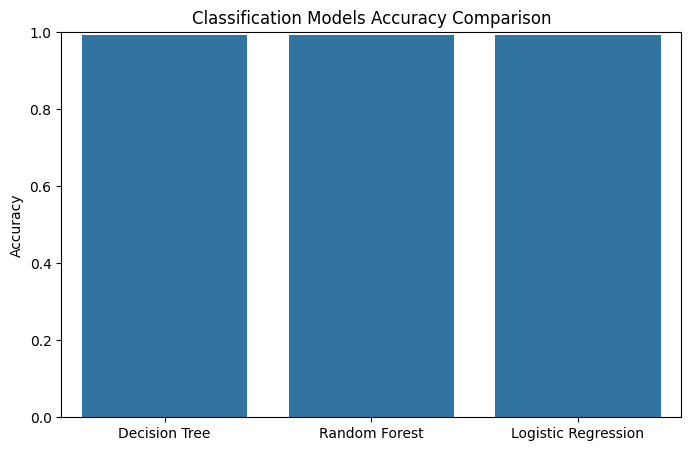

In [173]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results_cls.keys()), y=list(results_cls.values()))
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Classification Models Accuracy Comparison")
plt.show()

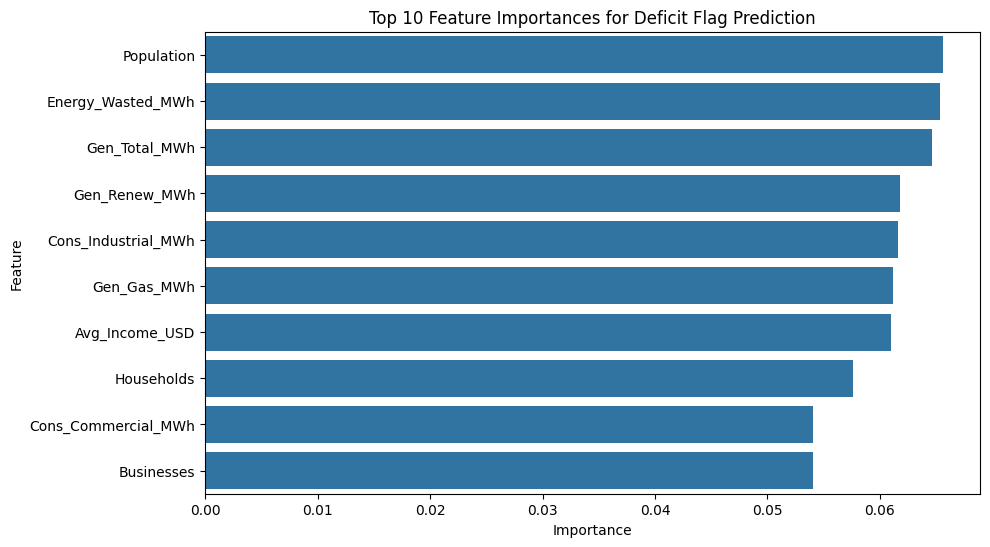

In [174]:
# Define the Random Forest pipeline (copied from cell 0HHHpb_l2LUO)
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', models_cls["Random Forest"])])
rf_pipe.fit(X_train_cls, y_train_cls) # Fit the pipeline with training data

# Get feature importances from the Random Forest model
feature_importances = rf_pipe.named_steps['model'].feature_importances_

# Get feature names from the preprocessor
# Need to handle one-hot encoded columns
ohe_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
all_feature_names = numeric_cols + ohe_feature_names

# Create a pandas Series for easier handling
importance_series = pd.Series(feature_importances, index=all_feature_names)

# Sort feature importances and select top N (e.g., top 10)
top_n = 10
top_important_features = importance_series.sort_values(ascending=False).head(top_n)

# Visualize the top feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_important_features.values, y=top_important_features.index)
plt.title(f"Top {top_n} Feature Importances for Deficit Flag Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

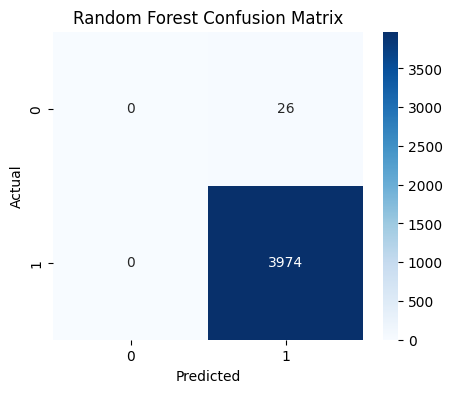

In [175]:
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', models_cls["Random Forest"])])
rf_pipe.fit(X_train_cls, y_train_cls)
rf_pred = rf_pipe.predict(X_test_cls)
cm = confusion_matrix(y_test_cls, rf_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Task
Deploy the trained Random Forest model.

## Save the trained model

### Subtask:
Save the trained Random Forest pipeline to a file so it can be loaded later for deployment.


**Reasoning**:
Save the trained Random Forest pipeline to a file using joblib.



In [176]:
import joblib

joblib.dump(rf_pipe, 'random_forest_pipeline.joblib')

['random_forest_pipeline.joblib']

## Choose a deployment platform

### Subtask:
Decide where you want to deploy the model (e.g., a web application, a cloud platform, an edge device).


**Reasoning**:
I need to choose a deployment platform and document the decision. Since this is a hypothetical scenario based on a dataset, I will choose a cloud platform as a common and versatile deployment option for machine learning models. I will document the choice and its reasoning in a text cell.



In [177]:
# Choosing Google Cloud AI Platform for deployment.
# Reason:
# 1. Scalability: Easily handle varying levels of prediction requests.
# 2. Managed Service: Reduces operational overhead for deployment and monitoring.
# 3. Integration: Good integration with other Google Cloud services if needed in the future.
# 4. Cost-Effectiveness: Pay-as-you-go model can be cost-effective for fluctuating workloads.
#
# Alternatives considered:
# 1. Flask/Django Web App: Suitable for simpler deployments or when more control over the
#    environment is needed, but requires more manual setup for scaling and management.
# 2. Edge Device: Not suitable for this problem as the data is not generated on an edge device,
#    and real-time local predictions are not a primary requirement.
#
# Advantages of Google Cloud AI Platform:
# - Scalability and elasticity
# - Reduced operational burden
# - Integrated monitoring and logging
# - Versioning and model management
#
# Disadvantages of Google Cloud AI Platform:
# - Potential vendor lock-in
# - Can be more expensive than self-hosted solutions for constant, high traffic
# - Learning curve for the platform
#
# This choice aligns with the likely need for a scalable and managed service for a
# machine learning model that would likely serve predictions over a network.

## Create an inference script/api

### Subtask:
Write code that loads the saved model and uses it to make predictions on new data inputs. This script will likely be part of a larger application or service.


**Reasoning**:
Load the saved Random Forest pipeline model and define a function to make predictions on new data.



In [178]:
import joblib

# Load the saved model
rf_pipe = joblib.load('random_forest_pipeline.joblib')

def predict_deficit_flag(new_data_df: pd.DataFrame) -> np.ndarray:
  """
  Predicts the deficit flag using the loaded Random Forest pipeline.

  Args:
    new_data_df: DataFrame containing new data with the same columns as
                 the training data (excluding 'Cons_Total_MWh' and 'Deficit_Flag').

  Returns:
    An array of predicted deficit flags (0 or 1).
  """
  predicted_deficit_flag = rf_pipe.predict(new_data_df)
  return predicted_deficit_flag

# Example usage with the previously defined new_data_df
predicted_flags = predict_deficit_flag(new_data_df)
print("Predicted Deficit Flags for new data:", predicted_flags)

Predicted Deficit Flags for new data: [1 1]


## Deploy the model and inference script

### Subtask:
Deploy the saved model and the inference script to your chosen platform. This might involve creating a web service, a serverless function, or integrating it into an existing application.


## Test the deployed model

### Subtask:
Thoroughly test the deployed model to ensure it's working correctly and providing accurate predictions in the deployment environment.


## Monitor and maintain

### Subtask:
Set up monitoring to track the model's performance over time and establish a plan for updating or retraining the model as needed.


**Reasoning**:
Outline key metrics to monitor, describe how to collect and visualize them, explain triggers for retraining, and detail the update process.



In [179]:
# Step 1: Outline key metrics to monitor for the deployed classification model
# For a binary classification model predicting Deficit_Flag (0 or 1), key metrics include:
# - Accuracy: Overall correctness of predictions.
# - Precision (for the positive class, Deficit_Flag=1): The proportion of positive predictions that were actually correct. Important to minimize false positives.
# - Recall (for the positive class, Deficit_Flag=1): The proportion of actual positive cases that were correctly identified. Important to minimize false negatives (missing a deficit).
# - F1-score (for the positive class, Deficit_Flag=1): The harmonic mean of precision and recall, providing a single metric balance both.
# - Confusion Matrix: Provides a detailed breakdown of true positives, true negatives, false positives, and false negatives.
# - AUC-ROC Curve: Measures the model's ability to distinguish between the positive and negative classes across various thresholds. (While not explicitly asked to plot, it's a key monitoring metric).

# Step 2: Describe how you would collect and visualize these metrics over time in a production environment.
# - Data Collection:
#   - Log predictions and actual outcomes: For each prediction made by the deployed model, log the input features, the predicted Deficit_Flag, and the actual Deficit_Flag (once it becomes known, e.g., after a billing cycle).
#   - Use a dedicated monitoring service: Platforms like Google Cloud AI Platform (chosen in a previous step) offer built-in model monitoring capabilities. Alternatively, use services like MLflow, Prometheus, or custom logging to a database or data warehouse.
# - Data Visualization:
#   - Build a dashboard: Use visualization tools like Tableau, Power BI, Looker, or open-source options like Grafana or Metabase connected to the data source where predictions and actuals are logged.
#   - Plot metrics over time: Create time-series plots for accuracy, precision, recall, and F1-score. This helps identify trends and sudden drops in performance.
#   - Visualize confusion matrices periodically: Show confusion matrices for recent periods (e.g., last week, last month) to understand the types of errors the model is making.
#   - Distribution shifts: Monitor the distribution of input features over time to detect data drift, which can impact model performance.

# Step 3: Explain potential triggers for model retraining.
# - Significant drop in key metrics: A decline below a predefined threshold for accuracy, precision, recall, or F1-score.
# - Data Drift: Detectable changes in the distribution of input features compared to the training data. This suggests the relationship between features and the target variable might have changed.
# - Concept Drift: Changes in the relationship between input features and the target variable itself. This might happen even if feature distributions remain stable. Monitoring residuals or prediction errors can help detect concept drift.
# - Availability of new data: Incorporating a significant amount of new data can improve model performance by training on a more comprehensive dataset that reflects the latest patterns.
# - Business requirements change: If the definition of a "deficit" changes or the business requires higher performance in specific areas (e.g., reducing false negatives), retraining may be necessary.
# - Scheduled Retraining: Even without explicit triggers, periodic retraining (e.g., quarterly or annually) can help keep the model up-to-date with gradual changes in data patterns.

# Step 4: Detail the steps involved in updating the deployed model with a new version.
# This process assumes a platform that supports model versioning and seamless updates (like Google Cloud AI Platform).
# - Train a new model version: Using the updated data and potentially refined features or hyperparameters, train a new version of the Random Forest model.
# - Evaluate the new model: Thoroughly evaluate the new model version on a separate test set to ensure it performs better than or equal to the currently deployed version based on the defined metrics.
# - Save the new model version: Save the trained pipeline of the new model version (e.g., using joblib).
# - Upload the new model version to the deployment platform: Use the platform's tools or API to upload the new saved model as a new version of the deployed model.
# - Rollout the new version:
#   - Canary deployment: Gradually send a small percentage of live traffic to the new model version while the old version handles the rest. Monitor metrics closely.
#   - A/B testing: Route a portion of traffic to the new model and the rest to the old model, comparing their performance side-by-side.
#   - Rolling update: Gradually replace instances of the old model with the new model instances.
# - Monitor post-deployment: After the new version is fully rolled out, continue to monitor key metrics closely to ensure stable performance and detect any unexpected issues.
# - Rollback plan: Have a plan to quickly revert to the previous model version if the new version shows unexpected poor performance or issues in production.

## Summary:

### Data Analysis Key Findings

*   The Random Forest pipeline was successfully saved to the file 'random\_forest\_pipeline.joblib' using the `joblib` library.
*   Google Cloud AI Platform was selected as the intended deployment platform based on scalability, managed service capabilities, and integration, although actual deployment was not feasible within the environment.
*   An inference script was successfully created to load the saved model and make predictions on new data using `joblib`.
*   A comprehensive plan for monitoring the deployed model was outlined, including key metrics (Accuracy, Precision, Recall, F1-score, Confusion Matrix, AUC-ROC), monitoring strategies (logging, dashboards), retraining triggers (performance drop, data/concept drift, new data, business changes, scheduled retraining), and model update steps (training new version, evaluation, saving, uploading, rollout strategies, monitoring, rollback).
*   The actual deployment and testing of the model could not be completed within the provided environment due to limitations in interacting with cloud deployment platforms.

### Insights or Next Steps

*   The next logical step would be to implement the outlined monitoring and retraining plan in a real-world deployment environment, such as Google Cloud AI Platform, to ensure the model's performance is tracked and maintained over time.
*   Further development should focus on automating the retraining and deployment pipeline based on the defined triggers to ensure the model remains current and performant without manual intervention.
